# Plotting with Geoplot and GeoPandas

[GeoPandas > Docs > Examples Gallery > Plotting with Geoplot and GeoPandas](http://geopandas.org/gallery/plotting_with_geoplot.html)

<br>

[geoplot's documentation](https://residentmario.github.io/geoplot/index.html)

In [7]:
import geopandas
import geoplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs')) # 자치구
collisions = geopandas.read_file(geoplot.datasets.get_path('nyc_injurious_collisions')) # 충돌

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [4]:
boroughs.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,(POLYGON ((-74.05050806403247 40.5664220341608...
1,4,Queens,861038.47930,3.049947e+09,(POLYGON ((-73.83668274106708 40.5949466970158...
2,3,Brooklyn,726568.94634,1.959432e+09,(POLYGON ((-73.8670614947212 40.58208797679338...
3,1,Manhattan,358532.95642,6.364422e+08,(POLYGON ((-74.01092841268033 40.6844914725429...
4,2,Bronx,464517.89055,1.186804e+09,(POLYGON ((-73.89680883223775 40.7958084451597...


In [5]:
collisions.head()

,id,NUMBER OF PERSONS INJURED,BOROUGH,geometry
0,11,1,BROOKLYN,POINT (-73.94268479999999 40.676495)
1,21,1,MANHATTAN,POINT (-74.0083444 40.7213228)
2,27,1,BROOKLYN,POINT (-73.9707643 40.6876384)
3,28,1,BRONX,POINT (-73.83874250000002 40.8812664)
4,33,1,BROOKLYN,POINT (-73.98872990000002 40.5930014)


<br>

## Plotting with Geoplot

We start out by replicating the basic GeoPandas world plot using Geoplot.

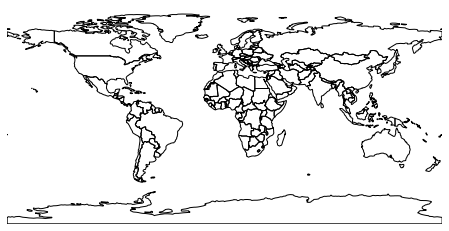

In [10]:
geoplot.polyplot(world, figsize=(8,4))
plt.show()

### `polyplot`

Geoplot can re-project data into any of the map projections provided by CartoPy.

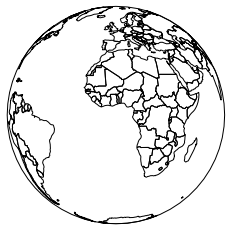

In [13]:
# use the Orthographic(정사영의) map projection(투영) (e.g. a world globe)
ax = geoplot.polyplot(world,
                      projection=geoplot.crs.Orthographic(),
                      figsize=(8,4))
ax.outline_patch.set_visible(True)
plt.show()

<br>

### `choropleth`

`polyplot` is trivial and can only plot the geometries you pass to it. If you want to use color as a visual variable, specify a `choropleth`. Here we sort GDP per person by country into five buckets by color.

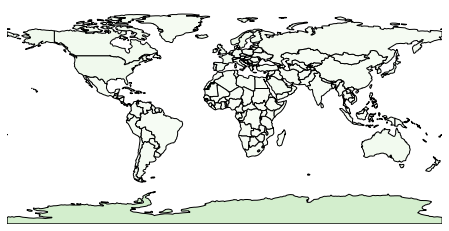

In [15]:
geoplot.choropleth(world,
                   hue=world['gdp_md_est'] / world['pop_est'],
                   cmap='Greens',
                   figsize=(8,4)
                  )
plt.show()

<br>

### `cartogram`

If you want to use size as a visual variable, use a `cartogram`. Here arer population estimates for countries in Africa.

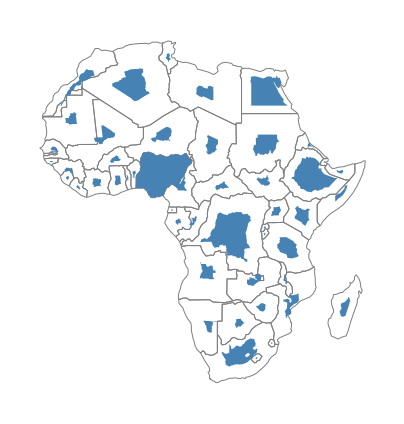

In [18]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(africa,
                       scale='pop_est',
                       limits=(0.2, 1),
                       edgecolor='None',
                       figsize=(7,8))

geoplot.polyplot(africa, edgecolor='gray', ax=ax)

plt.show()

<br>


### `kdeplot`

If we have data in the shape of points in space, we may generate a three-dimensional heatmap on it using `kdeplot`.

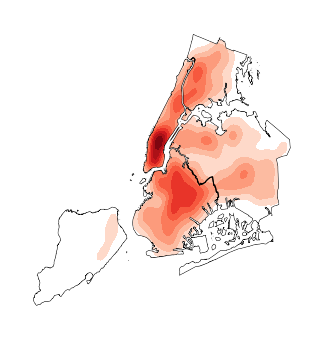

In [21]:
ax = geoplot.kdeplot(collisions,
                     clip=boroughs.geometry,
                     shade=True,
                     cmap='Reds',
                     projection=geoplot.crs.AlbersEqualArea()
                    )
geoplot.polyplot(boroughs, ax=ax, zorder=1)

plt.show()

<br>

### voronoi

Alternatively, we may partition the space into neighborhoods automatically, using **Voronoi tessellation**. This is a good way of visually verifying whether or not a certain data column is apatially correlated.

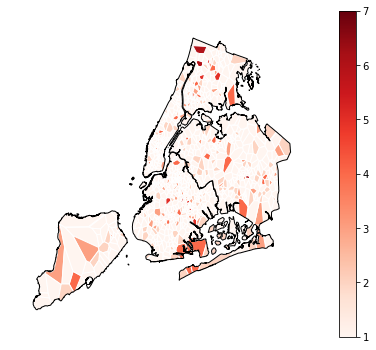

In [22]:
ax = geoplot.voronoi(collisions.head(1000),
                     projection=geoplot.crs.AlbersEqualArea(),
                     clip=boroughs.simplify(0.001),
                     hue='NUMBER OF PERSONS INJURED',
                     cmap='Reds',
                     k=None,
                     legend=True,
                     edgecolor='white'
                    )

geoplot.polyplot(boroughs, edgecolor='black', zorder=1, ax=ax)

plt.show()

<br>

These are just some of the plots you can make with Geoplot. There are many other possibilities not covered in the brief introduction. For more examples, refer to the [Gallery](https://residentmario.github.io/geoplot/gallery/index.html) in the Geoplot documentation.